<h1>$\color{blue}{\textbf{Case Study: Fighting Fraud}}$</h1>

***

<img src="Images/banner2.png" alt="Tec banner" style="display: auto;margin-left:auto;margin-right: auto;width:120%;"/>

***

<h1>$\color{blue}{\textbf{Beginner Version}}$</h1>

### <p align="justify" style="line-height:25px">This is a begginer version. It includes a lot of ($\color{red}{\textbf{encoded}}$) code and a lot of comments to help you along the study case. Follow the links to functions, modules and libraries documentations.<br><br>$\color{red}{\textbf{Attention!!!}}$<br>Whenever you see this image <img src="Images/broke.jpg" width="300" align="Center"/><br> it means that $\color{red}{\textbf{code is missing or an answer is required}}$ and you must fill these gaps. More precisely, within some code cells you will find the $\color{red}{\textbf{'missing'}}$ legend (key) and you must replace it as well with the proper code $\dots\color{red}{\textbf{be alert!}}$<br><br>$\color{red}{\textbf{Note: If you close the notebook, you will have to run all cells again upon-reopening it}}$.<br>   

<img src="Images/luck.jpg" width="100" align="Left"/><h2><br>$\,\,\,\color{green}{\textbf{Good luck solving this case!!! Have fun!!!}}$</h2>

# $\color{blue}{\textbf{Identification}}$
<table style="width:100%" align="right">
  <tr>
    <th><h2>$\color{black}{\textbf{Name}}$</h2></th>
    <th><h2>$\color{black}{\textbf{Student ID}}$</h2></th>
  </tr>
    
  <tr>
    <td><h3>$\color{black}{\text{Edgar Rubén Salazar Lugo}}$</h3></td>
    <td><h3>$\color{black}{\text{A01338798}}$</h3></td>
  </tr>
  <tr>
    <td><h3>$\color{black}{\text{Arturo Villagómez Gómez}}$</h3></td>
    <td><h3>$\color{black}{\text{A01336562}}$</h3></td>
  </tr>
    <tr>
    <td><h3>$\color{black}{\text{Avril Suárez Macedo}}$</h3></td>
    <td><h3>$\color{black}{\text{A01336525}}$</h3></td>
  </tr>
    <tr>
    <td><h3>$\color{black}{\text{Jorge Enrique Badiola Esparza}}$</h3></td>
    <td><h3>$\color{black}{\text{A01655214}}$</h3></td>
  </tr>
</table>

<h1>$\color{blue}{\textbf{Introduction}}$</h1>

### <p align="justify" style="line-height:25px">The total losses on UK cards (debit and credit) increased to £185 million in the first half of 2012, a 9% rise compared with the last six months of 2011 (source: UK Cards Association).<br><br>Although this is below the peak of £304 million in losses in the first half of 2008, criminals are increasingly resorting to traditional ways of stealing people's details to combat anti-fraud advances such as chip and PIN.</p>


<center style="font-weight: bold; font-size: 150%;">!! And the situation has only worsened in recent years !!</center>

<img src="Images/creditfraud.jpg" alt="Fraud" style="display: auto;margin-left:auto;margin-right: auto;width:40%;"/>

### <p align="justify" style="line-height:25px"> Unauthorised financial fraud losses across payment cards, remote banking and cheques totalled £844.8 million in 2018, an increase of 16% compared to 2017. In addition, in 2018 finance industry members reported 84,624 incidents of authorised push payment scams with gross losses of £354.3 million.<br><br>In this project we will load and explore a dataset that contains transactions made by credit cards in September 2013 by European cardholders. This dataset present transactions that occurred over the course of two days, where (according to [Université Libre de Bruxelles](https://mlg.ulb.ac.be/wordpress/)) 492 frauds were detected out of the 284,807 transactions.<br><br>Part of the challenge will be dealing with such a large dataset (one which, for example, usually causes Microsoft Excel to crash). Ultimately our aim is to compare and contrast various machine learning algorithms - in order that we may find those 492 fraudulent transactions ourselves.<br><br>In particular, the project will allow us to investigate methods of dealing with a highly unbalanced dataset, where the positive class (fraudulent transactions) account for just 0.172% of all transactions - thereby (possibly!) rendering many common and well known machine learning algorithms ineffective.</p>

<h1>$\color{blue}{\textbf{Python Imports and Setup}}$</h1>

### <p align="justify" style="line-height:25px">Run the following cell to import all the libraries you need to complete the case study into the Jupyter Notebook.<br><br>The first command simply ensures that any plot we produce in this notebook is immediately displayed on screen, directly below the code that created it.</p>

In [1]:
%matplotlib inline

try:
    import scipy.stats as stats
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
except ModuleNotFoundError as err:
    print("Python says:", err, "... possibly because it isn't installed on your system?")
except:
    print("Some other error occurred when importing.")
else:
    print("Imports successful!")
    sns.set()

Imports successful!


# $\color{blue}{\textbf{The Dataset}}$

</br></br>

### <p align="justify" style="line-height:25px">The dataset we will be using for this project is a CSV file named $\color{blue}{\texttt{creditcard.csv}}$, which you can find on our [GitHub repository](https://github.com/semana-i-2019) in the $\color{blue}{\texttt{Fighting Fraud}}$ folder.

### $\color{red}{\textbf{Note: Since the file is 66 MB, do not try and print its contents in a Notebook cell:}}$

### <p align="justify" style="line-height:25px">This will either crash the Notebook, or take too long to process, or take up a rididculous amount of space in your Notebook (which you do not want to have to take forever to scroll through). Besides, getting a grasp of what your data looks like is part of the challenge of data exploration!</p>

<a id='Original-DataFrame'></a>
<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Read the data}}$</h1>

### <br>[Read the file](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) $\color{blue}{\texttt{creditcard.csv}}$ and name it ${\color{blue}{\texttt{df}\_{\text{orig}}}}$ as in "DataFrame Original".

In [2]:
df_orig = pd.read_csv('Credit Card.csv')
df_orig

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<img src="Images/exploratory.png" alt="Tec banner" style="display: auto;margin-left:auto;margin-right: auto;width:150%;"/>

### <p align="justify" style="line-height:25px"> We are lucky that the dataset has already been cleaned and properly organised to allow it to be read straight into a pandas DataFrame data structure. Thus, it is already structured into rows and columns $\dots$ much like a Microsoft Excel spreadsheet $\dots$ and those columns are appropriately named. However, it is still invaluable to thoroughly explore the dataset to be totally satisfied. For example, how can we be completely confident there are no $\color{blue}{\texttt{n/a}}$ or $\color{blue}{\texttt{nan}}$ to deal with?</p> 

<h1>$\color{blue}{\textbf{𝐐𝐮𝐢𝐜𝐤 𝐃𝐚𝐭𝐚𝐅𝐫𝐚𝐦𝐞 𝐬𝐮𝐦𝐦𝐚𝐫𝐲}}$</h1>

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{How many transactions and variables are there?}}$</h1>

### <p align="justify" style="line-height:25px">Use the [pandas shape](<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html>) attribute to return the dimensions of the DataFrame.<br><br>This command returns a [tuple](<https://docs.python.org/3.3/tutorial/datastructures.html#tuples-and-sequences>) that represents the dimensionality of the DataFrame - that is, the number of rows, and number of columns.<br><br>Note how we can access the rows and then the columns separately by using the index operator (the square brackets) with $0$ for rows, and $1$ for columns. Again, as noted above, try to think of the DataFrame as if it were a Microsoft Excel spreadsheet.</p>

In [3]:
df = pd.DataFrame(df_orig)
df.shape

(284807, 31)

<a id='info'></a>
<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{How can we get a summary of the DataFrame?}}$</h1>

### <br> <p align="justify" style="line-height:25px">Particularly, let us get [information about our DataFrame's](<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html>) column names, column data types, and whether there are any null ($\color{blue}{\texttt{n/a}}$ or $\color{blue}{\texttt{nan}}$) values to deal with.

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

<img src="Images/broke.jpg" width="100" align="Left"/>
<h1>$\,\,\,\color{blue}{\textbf{A random sample of n transactions}}$</h1>

### <p align="justify" style="line-height:25px">Since the dataset is so big, printing it out here (or indeed trying to open it in Microsoft Excel) is either impractical or just not possible. In which case, we can ask pandas to show us a random sample of n rows (all columns) using the [sample method](<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html>).<br><br> The $\color{blue}{\texttt{axis}}$ you choose defaults to $\color{blue}{\texttt{None}}$, which fallsback to the data type of the object ([${\color{blue}{\texttt{df}\_{\text{orig}}}}$](#Original-DataFrame)) that you're querying ( $0$ for Series and DataFrames, $1$ for Panels). Thus, to be specific, we explicitly choose axis $0$, so that we get back a random sampling of rows from our DataFrame.

In [5]:
df.sample(n=10, random_state=1)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0
196117,131364.0,0.077197,0.482928,-2.234233,-1.309124,2.386570,3.392581,-0.156385,1.353569,-0.047112,...,0.060865,-0.060530,0.379575,0.598853,-0.878618,0.254859,-0.088550,-0.023446,69.90,0
24533,33274.0,-0.958584,1.109086,1.558159,0.878707,1.914559,1.564757,1.300978,0.074098,-1.376977,...,0.155271,0.657607,-0.296222,-1.053362,0.006475,-0.058981,-0.528679,-0.374450,6.55,0
13629,24158.0,-0.992899,1.430204,1.071256,1.363127,0.116315,0.217868,0.208391,0.319128,1.483134,...,-0.258903,-0.104189,-0.100144,-0.369103,-0.068048,-0.266731,0.080402,-0.034571,1.00,0
246673,153276.0,-1.143693,-0.250983,1.013022,-0.671080,1.363438,0.312673,0.786158,-0.089323,-0.272429,...,-0.094134,-0.137349,-0.047086,0.058485,0.825118,0.316019,-0.377194,-0.246404,84.15,0
91842,63649.0,0.555043,-0.099484,-0.102234,-0.624145,1.484364,4.154536,-1.242699,0.286054,0.694670,...,0.649935,-0.578303,0.057823,1.026542,0.440906,0.303285,0.146932,0.172708,17.24,0


<img src="Images/an1.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Anonymised Data}}$</h1>
    
### <p style="line-height:25px">  We're dealing with a dataset of credit card transactions, but for data protection purposes, the data has been anonymised, which is why we see column labels such as V1, V2, etc. And it is also why, unfortunately, we probably wont be able to say much more about these columns nor draw many more conclusions from them.<br><br>After a transaction is authorized, it becomes a vector with few variables such as $\color{blue}{\texttt{Card}\_{\texttt{Id}}}$, $\color{blue}{\texttt{Amount}}$, $\color{blue}{\texttt{Date}}$, $\color{blue}{\texttt{Merchant}}$, $\color{blue}{\texttt{Product}}$ and so on. New features are aggregated, features such as number of daily transactions, weekly average expenditure, etc., and then merged with the original features to form a new vector which is analyzed in typically less than six seconds.<br><br>Due to confidentiality issues, banks cannot provide the original features and more background information about the data. Features V1, V2,$\dots$, V28 are the principal components obtained with a [Principal Component Analysis (PCA)](https://www.sciencedirect.com/topics/engineering/principal-component-analysis) transformation. The only features which have not been transformed with PCA are $\color{blue}{\texttt{Time}}$, $\color{blue}{\texttt{Amount}}$ and $\color{blue}{\texttt{Class}}$.
    
<img src="Images/pca.jpeg" alt="PCA" style="display: auto;margin-left:auto;margin-right: auto;width:35%;"/>
    
### <p style="line-height:25px">Principal component analysis (PCA) is a multivariate analysis technique, which transforms original data into new uncorrelated variables called principal components (PCs). The original data are treated as independent variables and each PC is a linear combination of these original variables. The PCs form the basis of a vector space and they are arranged in order of decreasing variance. Thus the first PC carries the most information regarding the original data, and so on.<br><br>Apart from producing derived variables for use in supervised learning problems, PCA produces a low-dimensional representation of a data set; it also serves as a tool for data visualization.

</p>


<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{DataFrame Descriptive Statistics}}$</h1>

### <p align="justify" style="line-height:25px">Generate descriptive statistics that summarize the DataFrame values.<br><br>The feature $\color{blue}{\texttt{Class}}$ is the response variable and it takes a value $1$ in case of fraud and $0$ otherwise; therefore, exclude the column $\color{blue}{\texttt{Class}}$ from the report, since reporting descriptive statistics does not make any sense for this column.<br> $\color{red}{\textbf{Hint}}$: You want to exclude an [int64-type object](#info).<br><br>The pandas method [describe](<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html>) analyzes both numeric and object data types, as well as DataFrame column sets of mixed data types.<br><br>From the profile report above we know that the data types are all numeric - so we should expect $\color{blue}{\texttt{describe}}$ to return, for each column, a standard five-number summary (minimum, lower quartile, median, upper quartile, maximum) as well as a report on the dataset's dispersion, central tendency, and a count of how many rows there are.</p>

In [6]:
df.describe(exclude=[np.int64])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


<a id='Transaction-Amount-and-Time-Descriptive-Statistics'></a>
<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Focus on Time and Amount}}$</h1>

### <p align="justify" style="line-height:25px"><br>Feature $\color{blue}{\texttt{Time}}$ is the number of seconds elapsed between a particular transaction and the first transaction in the dataset. The feature $\color{blue}{\texttt{Amount}}$ is just the transaction amount.<br><br>Columns $\color{blue}{\texttt{Amount}}$ and $\color{blue}{\texttt{Time}}$ may well provide us with useful information about the spending habits of the "average" credit card holder. In turn, this might prove useful for spotting any (fraudulent?) outliers, such as:<br><br>$\bullet$ Particularly high expenditures - perhaps suggesting a one off money grab by a fraudster?<br><br>$\bullet$ Obscure spending patterns such as multiple amounts of the same value - perhaps suggesting an automated bot-transaction has been set in action to skim funds from the account holder, without drawing attention to itself?<br><br> Generate the descriptive statistics of these two columns using the [pandas function loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html): Focus on all rows (the colon) for column labels $\color{blue}{\texttt{Time}}$ and $\color{blue}{\texttt{Amount}}$ only (i.e., non-anonymized columns). Then run $\color{blue}{\texttt{describe()}}$ on these columns.

In [7]:
time = df_orig.loc[:,['Time']].describe()
time

,Time
count,284807.000000
mean,94813.859575
std,47488.145955
min,0.000000
25%,54201.500000
50%,84692.000000
75%,139320.500000
max,172792.000000


In [8]:
amount = df_orig.loc[:,['Amount']].describe()
amount

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Fraudulent and non-fraudulent transactions}}$</h1>

### <p align="justify" style="line-height:25px">The column $\color{blue}{\texttt{Class}}$ (case-sensitive) contains either a $0$, meaning a regular, non-fraudulent transaction, or a $1$, meaning a fraudulent transaction.<br><br>1. Extract the column class from the DataFrame. Simply typing $\color{blue}{\texttt{df}\_\texttt{orig.Class}}$ into a Notebook cell will return a [pandas Series object](<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html>), which you can think of as a column of data, where the rows have been labelled (with row numbers). This will contain only the column labelled $\color{blue}{\texttt{Class}}$.<br><br>2. Next, rather than saving the above Series object to a variable, "chain" a second command onto the end of the $\color{blue}{\texttt{df}\_\texttt{orig.Class}}$ command above. This second command is the [counts method](<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>), which returns another pandas Series object, only this time containing a count of the occurence of unique values from the original $\color{blue}{\texttt{Class}}$ column.<br><br><a id='Fraudulent-non-fraudulent-transactions'></a> 3. Save this chain to a variable called $\color{blue}{\texttt{counts}}$. Thus, each unique value from the original $\color{blue}{\texttt{Class}}$ column will be given it's own row  with a value that equals the number of times it appears in the original.<br><br> 4. There will be as many rows in this new Series object as there are unique values in the original $\color{blue}{\texttt{Class}}$ column. Thus, again, you should expect there to be only two types of elements in the variable $\color{blue}{\texttt{counts}}$, one for fraudulent transactions (of value $1$) and one for non-fraudulent transactions (of value $0$). Double check this by using $\color{blue}{\texttt{len(counts)}}$, which should equal $2$.

In [9]:
# Code for steps 1,2 and 3. Replace 'missing':

counts = df_orig.Class.value_counts()

# Code for 4. Check that there are indeed two classes. Replace 'missing' (fancy).

if (len(counts) != 2):
    raise ValueError("ERROR: THERE SHOULD ONLY BE TWO CLASSES")
else:
    print("There are only two classes.")

There are only two classes.


<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Fraudulent vs non-fraudulent transactions}}$</h1>

###  <p align="justify" style="line-height:25px">1. Use the variable [$\color{blue}{\texttt{counts}}$](#Fraudulent-non-fraudulent-transactions) to count the number of fraudulent and non-fraudulent transactions, and save these counts on variables called ${\color{blue}{\texttt{fraud}\_{\texttt{count}}}}$ and ${\color{blue}{\texttt{non}\_{\texttt{fraud}\_{\texttt{count}}}}}$, respectively. Use square brackets to select items from [$\color{blue}{\texttt{counts}}$](#Fraudulent-non-fraudulent-transactions) that equal whatever is in the bracket; remember, $0$ stands for non-fraudulent and $1$ for fraudulent.<br><br>2. Check that the total number of transactions equals the sum of the number of fraudulent and non-fraudulent transactions.<br><br>3. Print the number of fraudulent and non-fraudulent transactions together with their percentages.</p> 

In [10]:
# Code for 1. Replace 'missing':

non_fraud_count = counts[0]
fraud_count = counts[1]

#Code for 2. Replace 'missing' (fancy):

if (len(df_orig.Class) != (non_fraud_count+fraud_count)):
    raise ValueError("ERROR: SUM OF FRAUDULENT AND NON-FRAUDULENT COUNTS DOES NOT EQUAL SHAPE OF DATA")
else:
    print("\nThe sum of fraudulent and non-fraudulent counts equals the shape of data.\n")
    
# Code for 3 (fancy)
    
pc_normal = (non_fraud_count/(non_fraud_count+fraud_count))*100
pc_fraudulent = (fraud_count/(non_fraud_count+fraud_count))*100

print('There were {} non-fraudulent transactions ({:.2f}%) and {} fraudulent transactions ({:.2f}%).'.format(non_fraud_count, pc_normal, fraud_count, pc_fraudulent))


The sum of fraudulent and non-fraudulent counts equals the shape of data.

There were 284315 non-fraudulent transactions (99.83%) and 492 fraudulent transactions (0.17%).


# $\color{blue}{\textbf{Visual Data Exploration}}$

### <p align="justify" style="line-height:25px">Numerical data exploration is not the only way we can explore our dataset. Indeed, in many cases, if you only relied on numerical exploration you might miss important details in the data that could mislead you into drawing entirely the wrong conclusions about the dataset.

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Transaction Time data distribution}}$</h1>

### <p align="justify" style="line-height:25px">Let us deal with just the Transaction Time column of data here - hence, formally, this can be described as a univariate distribution of observations. Thus, head to the [seaborn API](<http://seaborn.pydata.org/api.html#distribution-plots>) and have a look at the range of distribution plots available to us.<br><br>1. Produce either a histogram or a kernel density plot (better both!) of the distribution of Transaction Time data<br><br>2. Describe the distribution you obtained.

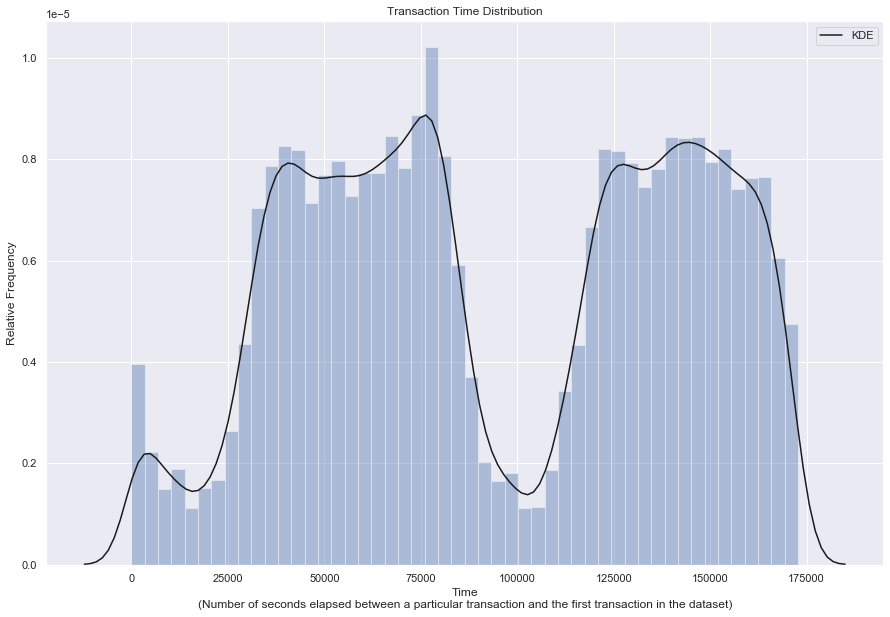

In [11]:
# Code. Replace 'missing':

# Create a 'Figure' object and a single 'axes.Axes' object with subplots from matplotlib, specify a figure size of (15,10):

fig, ax = plt.subplots(figsize=(15, 10))

# Set the plot title with set_title:

ax.set_title('Transaction Time Distribution')

# Represent y-axis labels in scientific notation (nothing to replace here):

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0));

# Create a distribution plot using seaborn. Replace 'missing' (fancy):

ax = sns.distplot(df_orig["Time"],
                  kde_kws={"linewidth": 1.5, "alpha": 1, "color": "k", "label": "KDE"},
                  axlabel='Time'+'\n'+'(Number of seconds elapsed between a particular transaction and the first transaction in the dataset)');

# Set the y-axis title with set_ylabel:

ax.set_ylabel("Relative Frequency");

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Transaction Time distribution description}}$</h1>

### <p align="justify" style="line-height:25px">Note that the distribution plot shows a $\color{red}{\underline{\text{multimodal}}}$ distribution. Thus from the point of view of a general statistical description it turns out that although several summary statistics have been suggested to describe such distributions, there is presently no agreed set of statistics that can properly quantify the parameters of [such a general distribution](https://www.thoughtco.com/definition-of-bimodal-in-statistics-3126325) $\dots\dots\dots$

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{So what conclusion(s) can we draw ourselves?}}$</h1>

### <p align="justify" style="line-height:25px">1. What is the maximum time value? What does it represent?<br><br>$\color{red}{\textbf{172,792}}$<br><br>2. Reconcile your answer in part 1 with the distribution you obtained in the previous cell; precisely, what does the transaction time distribution represent?<br><br>$\color{red}{\textbf{It represents the frequency of transactions between the reference transaction and each transaction through time.}}$<br><br>3. How could you explain the continued credit card activity through the night?<br><br>$\color{red}{\textbf{It can be explained because of services payments made at night through digital banking and the establishments that operate at that time.}}$

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Transaction Amount data distribution}}$</h1>

### <p align="justify" style="line-height:25px">Now let us deal with the Transaction Amount column of data here.<br><br>1. Produce either a histogram or kernel density plot (better both!) of the distribution of Transaction Amount data<br><br>2. Describe the distribution you obtain.

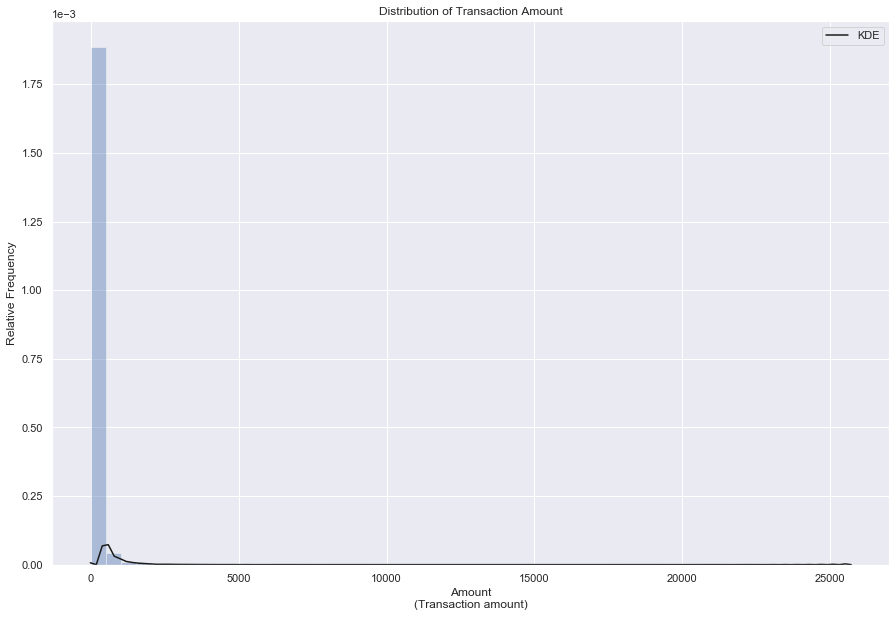

In [12]:
# Create a 'Figure' object and a single 'axes.Axes' object:

fig, ax = plt.subplots(figsize=(15, 10))

# Plot title:

ax.set_title('Distribution of Transaction Amount')

# Represent y-axis labels in scientific notation:

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0));

# Create a distribution plot using seaborn:

ax = sns.distplot(df_orig["Amount"],
                  kde_kws={"linewidth": 1.5, "alpha": 1, "color": "k", "label": "KDE"},
                  axlabel='Amount'+'\n'+'(Transaction amount)');

# Set the y-axis title:

ax.set_ylabel("Relative Frequency");


<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Transaction Amount distribution description}}$</h1>

### <p align="justify" style="line-height:25px">As noted above when first describing [transaction amount and time](#Transaction-Amount-and-Time-Descriptive-Statistics) with descriptive statistics - out of all credit card transactions:<br><br>* The mean was shown to be $\color{red}{\underline{\text{88.349619}}}$ USD - set against a median of $\color{red}{\underline{\text{22}}}$ USD.<br><br>* The standard deviation was shown to be $\color{red}{\underline{\text{250.120109}}}$ USD.<br><br>* The maximum transaction was shown to be $\color{red}{\underline{\text{25691.16}}}$ USD.<br><br>Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. As a rule of thumb we would normally expect the mean to be to the right of the median when the distribution is right skewed, and to the left of the median when the distribution has left skew. This, alongside a visual inspection of the above figure, clearly shows the distribution of transaction amount has a $\color{red}{\underline{\text{positive}}}$ skew, i.e. it is $\color{red} {\underline{\text{right}}}-$ skewed.

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Skewness}}$</h1>

### <p align="justify" style="line-height:25px">As an aside, compare the skewness of Transaction Time and Amount to their respective distribution plots:<br><br>The distribution plot of transaction amount showed a highly $\color{red}{\underline{\text{positive}}}$ skew.<br><br>The distribution plot of transaction time showed a more complex $\color{red}{\underline{\text{multimodal}}}$ distribution and thus (as we've mentioned already) although several summary statistics have been suggested to describe such distributions, there is no presently generally agreed set of statistics that can properly quantify the parameters of a general bimodal distribution.<br><br>1. How can we see this numerically? Find the [skew across columns](https://www.geeksforgeeks.org/python-pandas-dataframe-skew/) and store the skew in a variable called ${\color{blue}{\texttt{the}\_{\texttt{skew}}}}$.<br><br>2. What other variables show (from the code below) a fair amount of skew? Can you draw further conclusions from the skew of these anonymised variables?<br><br>$\color{red}{\textbf{Class}}$

In [13]:
# Code. Replace 'missing':

# Return unbiased skew over the requested axis. Use 'axis=0' here, it means across column labels.

the_skew = df.skew(axis=0)
the_skew

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

<a id="barplotfraudvsnormal"></a>
<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Plot Fraudulent vs Non-Fraudulent Transactions}}$</h1>

### <br><p align="justify" style="line-height:25px">Produce a visual comparison of the number of fraudulent transactions against the non-fraudulent ones. <br><br>As we noted earlier, one of the challenges of this dataset and this project is the highly unbalanced nature of the data we are using. There are (we would hope) far fewer fraudulent transactions than there are non-fraudulent ones and we can really draw attention to this with a bar chart. Use the variable [$\color{blue}{\texttt{counts}}$](#Fraudulent-non-fraudulent-transactions) that you defined in [fraudulent and non-fraudulent transactions](#Fraudulent-non-fraudulent-transactions).

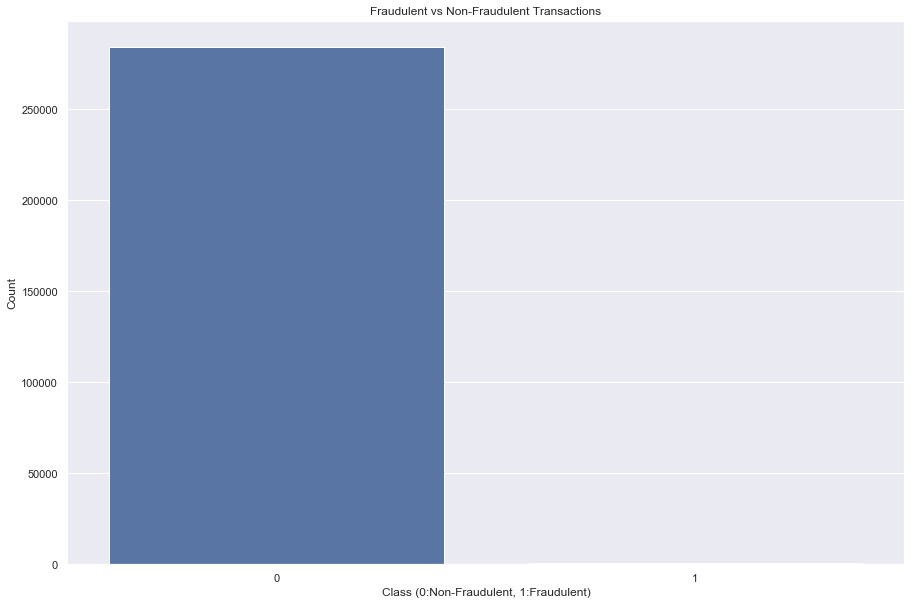

In [14]:
# Create a 'Figure' object and a single 'axes.Axes' object:

fig, ax = plt.subplots(figsize=(15, 10))

# Create a bar plot using seaborn. Use the variable 'counts':

ax = sns.barplot(x=counts.index, y=counts)

# Plot title:

ax.set_title('Fraudulent vs Non-Fraudulent Transactions')

# Set the y-axis title 'Count':
ax.set_ylabel('Count');

# Set the x-axis title. Specify the Class: 0 for non-fraudulent and 1 for fraudulent:
ax.set_xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)');

<a id="corr"></a>
<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Pearson Correlation amongst Columns}}$</h1>

### <br><p align="justify" style="line-height:25px">Compute the pairwise correlation of columns, excluding $\color{blue}{\texttt{NA}}$ and $\color{blue}{\texttt{null}}$ values and store it in a variable called $\color{blue}{\texttt{corr}}$.<br><br>The [pandas correlation method](<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html>), $\color{blue}{\texttt{corr}}$, defaults to Pearson (i.e., it will calculate the standard pairwise Pearson correlation coefficient), with a minimum number of observations required per pair of columns being $1$ in order to have a valid result.

In [15]:
# Code

corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777386e-12,-2.119585e-12,-1.724017e-13,-3.472870e-12,-1.306592e-13,-1.127393e-13,2.115132e-12,3.081639e-14,...,-3.276409e-12,2.281843e-12,-2.971523e-12,-1.029987e-12,1.146728e-12,1.835367e-12,7.624885e-12,-9.774773e-13,-0.227709,-0.101347
V2,-0.010593,3.777386e-12,1.000000e+00,2.326821e-12,-2.314711e-12,-1.832637e-12,9.439633e-13,5.403061e-12,2.153414e-14,3.239499e-13,...,2.280624e-12,-2.545709e-13,-4.855967e-12,6.430858e-13,-9.427890e-13,-4.128661e-13,-9.857578e-13,2.525320e-12,-0.531409,0.091289
V3,-0.419618,-2.119585e-12,2.326821e-12,1.000000e+00,2.036710e-13,-4.031527e-12,-1.582965e-13,3.404521e-12,-1.271766e-12,-6.819934e-13,...,6.735960e-13,-8.922035e-13,4.146836e-12,3.408174e-12,5.718362e-13,-2.576520e-12,-5.041949e-12,5.188994e-12,-0.210880,-0.192961
V4,-0.105260,-1.724017e-13,-2.314711e-12,2.036710e-13,1.000000e+00,-2.549916e-13,1.083580e-12,8.130086e-13,7.338233e-13,-7.138427e-13,...,-2.696261e-12,4.343923e-13,-4.161184e-12,-2.368673e-12,1.619552e-12,-3.045481e-13,-1.455904e-12,-2.832333e-12,0.098732,0.133447
V5,0.173072,-3.472870e-12,-1.832637e-12,-4.031527e-12,-2.549916e-13,1.000000e+00,-6.988066e-14,1.573950e-11,-2.038440e-12,-1.000460e-12,...,-1.752003e-12,7.097727e-13,3.616455e-12,-2.808758e-13,1.452161e-12,-1.895655e-13,-2.124508e-12,1.010195e-11,-0.386356,-0.094974
V6,-0.063016,-1.306592e-13,9.439633e-13,-1.582965e-13,1.083580e-12,-6.988066e-14,1.000000e+00,-2.798863e-12,-5.446449e-13,2.036992e-12,...,1.476734e-12,-1.145022e-12,-1.527599e-12,1.552011e-12,-2.723515e-12,3.351155e-12,1.480833e-12,-6.072099e-13,0.215981,-0.043643
V7,0.084714,-1.127393e-13,5.403061e-12,3.404521e-12,8.130086e-13,1.573950e-11,-2.798863e-12,1.000000e+00,5.528624e-12,5.086017e-13,...,2.787549e-12,-8.133708e-13,-4.292216e-12,-2.553519e-12,-7.410166e-13,-4.475969e-12,-1.328689e-11,2.955517e-13,0.397311,-0.187257
V8,-0.036949,2.115132e-12,2.153414e-14,-1.271766e-12,7.338233e-13,-2.038440e-12,-5.446449e-13,5.528624e-12,1.000000e+00,-2.243351e-12,...,-4.022297e-12,-2.679598e-12,9.013096e-13,-1.074225e-12,-3.268920e-12,1.043929e-12,-3.500241e-12,1.866554e-12,-0.103079,0.019875
V9,-0.008660,3.081639e-14,3.239499e-13,-6.819934e-13,-7.138427e-13,-1.000460e-12,2.036992e-12,5.086017e-13,-2.243351e-12,1.000000e+00,...,3.040341e-12,-7.470414e-13,-1.011172e-12,8.577402e-13,-1.589032e-12,-7.738355e-13,2.429466e-12,-1.406037e-12,-0.044246,-0.097733


<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Pearson Correlation Visualization}}$</h1>

### <p align="justify" style="line-height:25px">Produce a seaborn heatmap of the correlation between every variable in the dataset.<br><br>Set a $\color{blue}{\texttt{mask}}$ attribute such that data will not be plotted in cells where $\color{blue}{\texttt{mask}}$ is True:<br><br>1. Create a NumPy array, filled with zeros (which in Python also means False), that has the same shape as the $\color{blue}{\texttt{corr}}$ array. Since $\color{blue}{\texttt{corr}}$ and $\color{blue}{\texttt{mask}}$ have the same shape they will line up item-for-item / like-for-like.<br><br>2. Next, set $\color{blue}{\texttt{mask}}$ to True for those indicies that lie in the upper triange ($\color{blue}{\texttt{triu}\_{\texttt{indices}}\_{\texttt{from}}}$) of the matrix of correlation values.<br><br>3. Use seaborn's [heatmap method](<http://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap>) to create a matrix plot of the correlation coefficient for each variable in the dataset compared to every other variable.

Text(0.5, 1, 'HeatMap of Correlations between every Variable')

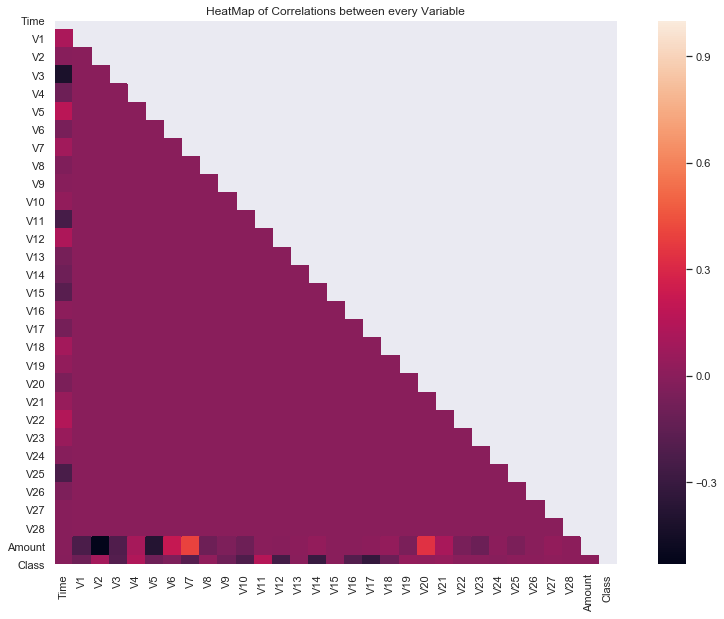

In [16]:
# Code for 1:

mask = np.zeros_like(corr)

# Code for 2:

mask[np.triu_indices_from(mask)] = True

# Code for 3:
# Create a 'Figure' object and a single 'axes.Axes' object:

fig, ax = plt.subplots(figsize=(15,10))

# Create a heatmap using seaborn:

with sns.axes_style("dark"):
    ax = sns.heatmap(data=corr, mask=mask, square=True)

# Plot title:

ax.set_title("HeatMap of Correlations between every Variable")

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Reading the correlation's table and heatmap}}$</h1>

### <p align="justify" style="line-height:25px"> Are there any pairs of variables you feel we could look at in more detail? Is there a non-negligible correlation between some variables? Which ones?<br><br>$\color{red}{\textbf{V7 and V20}}$<br><br>Create a [seaborn pairplot](<http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot>) of those variables (against one another, they should indicate the source of these correlations); use $\color{blue}{\texttt{hue}}$ to color the figures based on the categorical variable $\color{blue}{\texttt{Class}}$ and $\color{blue}{\texttt{markers}}$ to show fraudulent and non-fraudulent transactions with different symbols.<br><br> $\color{red}{\textbf{The code cell for this task may take some minutes, please be patient}}$.

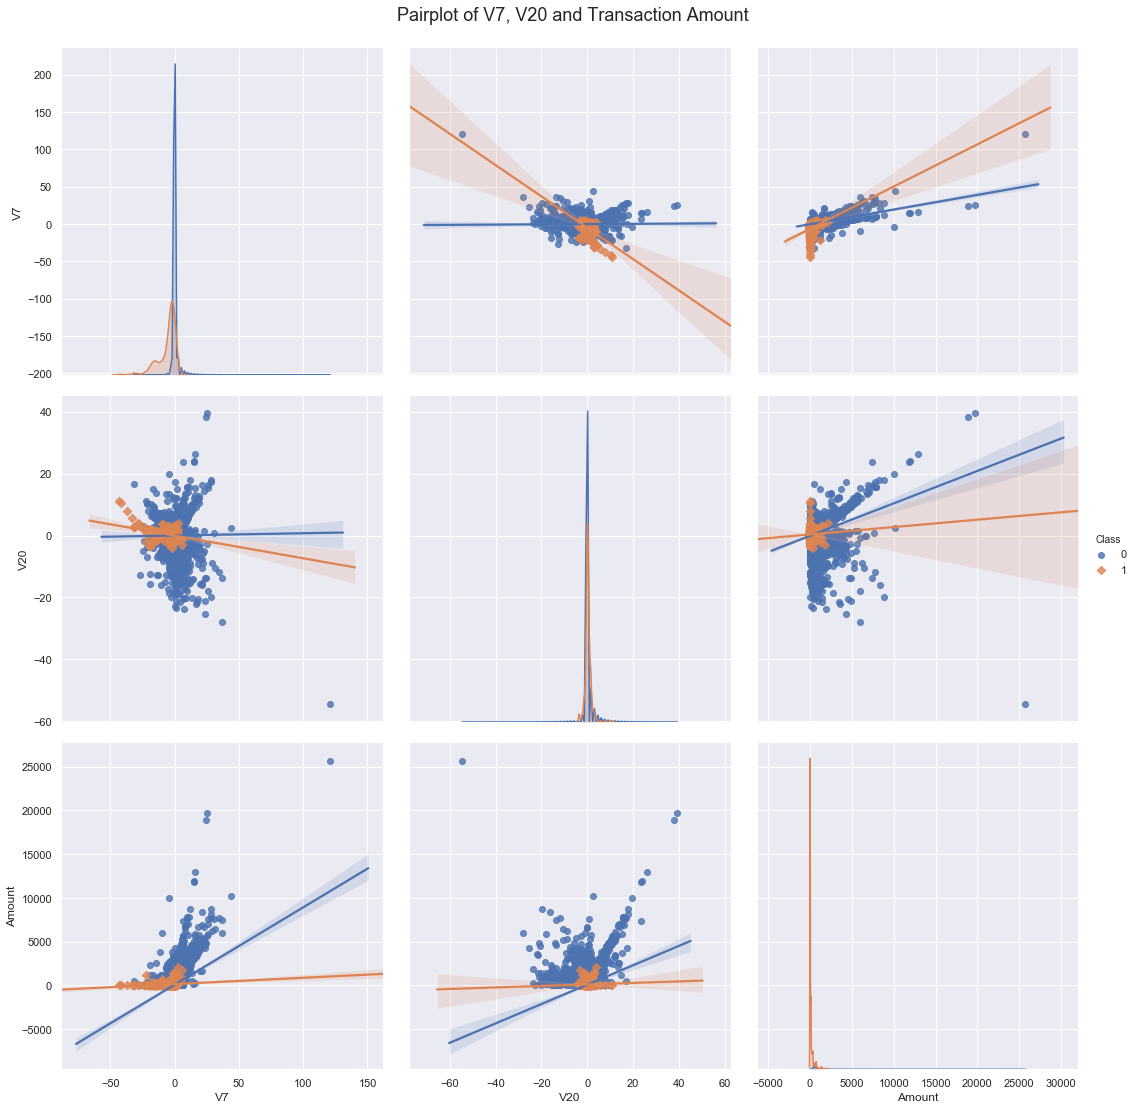

In [17]:
# Code

# Create a pairplot using seaborn. Fill the 'vars' parameter properly:
ax = sns.pairplot(data=df_orig, hue = 'Class', vars=["V7", "V20", "Amount"], diag_kind="kde", height=5, kind='reg', markers=["o", "D"]);

# Plot title. Fill the title properly:
ax.fig.suptitle('Pairplot of V7, V20 and Transaction Amount', y=1.025, fontsize=18);

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Reading the pairplot}}$</h1>

### <p align="justify" style="line-height:25px"> Sure enough we see that for both variables $\color{red}{\underline{\text{V7}}}$ and $\color{red}{\underline{\text{V20}}}$ the correlation against the Transaction $\color{red}{\underline{\text{Amount}}}$ variable occurs at values of $\color{red}{\underline{\text{V7}}}$ and $\color{red}{\underline{\text{V20}}}$ equal to $\color{red}{\underline{\text{zero}}}$.<br><br> Again, since the data set has been anonymised it is difficult to draw any further conclusions based on this. It may well be, for example, that the outliers in both variables are fraudulent transactions, given that the correlation has been heavily influenced by values typically around zero. We simply have no further evidence to take such a theory any further.

<img src="Images/machinelearning.png" alt="MachineLearning" style="display: auto;margin-left:auto;margin-right: auto;width:150%;"/>

<h1>$\color{blue}{\textbf{Preprocessing}}$</h1>

<h1>$\color{blue}{\textbf{Scale Transaction Amount and Time}}$</h1>

<h2>$\color{blue}{\textbf{Overview}}$</h2>

### <p align="justify" style="line-height:25px">When we seek to link predictor variable(s) to response variable(s) it is crucial to consider the scale of the data sets you intend to use in your chosen machine learning algorithm(s).<br><br> Put simply, with a range of predictor variables (independent variables) it will often be the case that the units, and therefore the scales, over which those predictors are measured (i.e their domain) will be different from one predictor variable to the next. This in turn will effect machine learning performance, stability, and error.<br><br>The problem will be compounded if the output variable(s) (i.e. the response variables) are then used in other processes further downstream. Therefore scaling of the machine learning outputs may also be necessary.
    
<img src="Images/scaling.jpeg" alt="Scale" style="display: auto;margin-left:auto;margin-right: auto;width:40%;"/>

### <p align="justify" style="line-height:25px">Differences in the scales across input predictor variables may actually increase the difficulty of the problem being modelled ([machinelearningmastery](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)).<br><br>For example, large input values, ranging over hundreds or thousands of units, can result in a model that learns large weight values.<br><br>In turn, a model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.<br><br>On the other hand, an output response variable with a large spread of values may result in large error gradient values causing weight values to change dramatically, again making the learning process unstable.

<h1>$\color{blue}{\textbf{Scaling input values}}$</h1>

### <p align="justify" style="line-height:25px">Examples of scaling predictor variables include using small values (such as within the range of $0$ to $1$), and variables that are standardized in some way (such as being transformed to have a zero mean and a standard deviation of one).<br><br>Broadly, we seek to scale input features such that they look more or less like standard, normally distributed data i.e. Gaussian with zero mean and variance ([preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)).<br><br>In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

### $$\textbf{Standardization:}\quad z = \frac{x-\mu}{\sigma}$$

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Scale transaction time}}$</h1>

### <p align="justify" style="line-height:25px">The $\color{blue}{\texttt{sklearn.preprocessing}}$ module includes scaling, centering, normalization, binarization and imputation methods.<br><br>API: <https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing><br>Guide: <https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing>

### <p align="justify" style="line-height:25px">1. Import the [$\color{blue}{\texttt{StandardScaler}}$](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) object from scikit-learn's [$\color{blue}{\texttt{preprocessing}}$](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) module and initialize it into a variable named $\color{blue}{\texttt{scaler}}$. The [$\color{blue}{\texttt{StandardScaler}}$](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) object standardizes features by removing the mean and scaling to unit variance.<br/><br/>2. Scale the transaction time input with the [$\color{blue}{\texttt{fit}\_{\texttt{transform}}}$](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform) method  into a variable named $\color{blue}{\texttt{scaled}\_{\texttt{time}}}$, this will create a 2D NumPy array.<br><br>Note that we use double brackets<a id="doublebrackets"></a> to extract the variable of interest from the original DataFrame - using double square brackets ensures you return a pandas DataFrame as the result (rather than a pandas Series).<br><br>3. Extract individual scaled transaction time entries (of which there are 284807) from the $\color{blue}{\texttt{scaled}\_{\texttt{time}}}$ 2D array and rebuild them into a new generic Python list variable (again, with length 284807, only this time it will only be 1D):<br><br>$\quad$a) Convert de NumPy array $\color{blue}{\texttt{scaled}\_{\texttt{time}}}$ into a generic Python list with the NumPy [$\color{blue}{\texttt{to}\_{\texttt{list}}}$](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.ndarray.tolist.html) attribute.<br><br>$\quad$b) Nest the above in a [$\color{blue}{\texttt{for}\dots{\texttt{in}}}$](https://docs.python.org/3/tutorial/controlflow.html#for-statements) construct.<br><br>In this way we can extract each item (that is, each scaled transaction time entry) in turn, creating a $\color{blue}{\texttt{sublist}}$, which should be a generic 1D Python list of individual scaled transaction time values.<br><br>$\quad$c) Iterate through the items of $\color{blue}{\texttt{sublist}}$, taking each one individually and building a new generic 1D Python list, <br>$\quad\,\,\,\,$ called $\color{blue}{\texttt{flat}\_{\texttt{list}}}$.<br><br>$\quad$d) Convert the generic Python list of scaled transaction times into a pandas Series object.

### \begin{align*}
\textbf{scaled_time } & \textbf{ $($a 2D NumPy array$)$} \\
&\downarrow \\
\textbf{sublist in scaled_time.tolist() } & \textsf{ $($a 1D Python list$)$} \\
&\downarrow \\
\textbf{item in sublist } & \textbf{ $($Python float$)$} \\
&\downarrow \\
\textbf{flat_list } & \textbf{ $($a 1D Python list$)$} \\
&\downarrow \\
\textbf{scaled_time } & \textbf{ $($pandas Series$)$}
\end{align*}

In [18]:
# Code for 1: Replace 'missing':

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Code for 2: Replace 'missing':

scaled_time = scaler.fit_transform(df_orig[['Time']])

# Code for 3 a), b) and c):

flat_list = [item for sublist in scaled_time.tolist() for item in sublist]

# Code for 4:

scaled_time = pd.Series(flat_list)

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Scale transaction amount}}$</h1>

### <p align="justify" style="line-height:25px">Scale the transaction amount column - pretty much identical to just above, where we scaled the transaction time.

In [19]:
# Code

# Code for 1: Replace 'missing':

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Code for 2: Replace 'missing':

scaled_amount = scaler.fit_transform(df_orig[['Amount']])

# Code for 3 a), b) and c):

flat_list = [item for sublist in scaled_amount.tolist() for item in sublist]

# Code for 4:

scaled_amount = pd.Series(flat_list)


<a id="concatenate"></a>
<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Concatenate scaled inputs}}$</h1>

### <p align="justify" style="line-height:25px">Create a new DataFrame named $\color{blue}{\texttt{df}\_{\texttt{with}}\_{\texttt{scaling}}}$ by concatenating the scaled transaction time and amount inputs (as created above) with the original DataFrame.<br><br>Use pandas [$\color{blue}{\texttt{concat}}$](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to add the named pandas Series ($\color{blue}{\texttt{scaled}\_{\texttt{amount}}}$ and $\color{blue}{\texttt{scaled}\_{\texttt{time}}}$) to the original DataFrame that we read in originally ([$\color{blue}{\texttt{df}\_{\texttt{orig}}}$](#Original-DataFrame)). Specifically requesting $\color{blue}{\texttt{axis=1}}$ means we are adding two new columns.<br><br> Get a grasp of what your data looks like now with a sample of size $n=5$.

In [20]:
#Code to concatenate. Replace 'missing':

df_with_scaling = pd.concat([df_orig, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)

# Code for sampling:

df_with_scaling.sample(n=5, random_state=1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0,-0.346073,0.528409
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0,-0.345313,-0.346905
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0,-0.349671,-0.261789
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0,-0.289340,-1.328689
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0,-0.350191,-0.292513


<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Drop non-scaled inputs from original DataFrame}}$</h1>

### <p align="justify" style="line-height:25px">Remove the original, non-scaled transaction time and amount columns from the new DataFrame you have just created ($\color{blue}{\texttt{df}\_{\texttt{with}}\_{\texttt{scaling}}}$). In doing so, save the result to yet another new DataFrame named $\color{blue}{\texttt{df}\_{\texttt{scaled}}}$.<br><br>Use the [$\color{blue}{\texttt{drop}}$](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) attribute of the pandas DataFrame $\color{blue}{\texttt{df}\_{\texttt{with}}\_{\texttt{scaling}}}$ to remove the two original columns of Transaction Amount and Time.<br><br> Overall, we will be left with a brand new pandas DataFrame, named $\color{blue}{\texttt{df}\_{\texttt{scaled}}}$ that contains all the original variables - except for Transaction Time and Amount, which have been replaced by their scaled originals.<br><br> Get a grasp of what your data looks like now with a sample of size $n=5$. 

In [21]:
# Code. Replace 'missing'

df_scaled = df_with_scaling.drop(['Time', 'Amount'], axis=1, inplace=False)

# Code for sampling:

df_scaled.sample(n=5, random_state=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,0,-0.346073,0.528409
127467,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,0,-0.345313,-0.346905
137900,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0,-0.349671,-0.261789
21513,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,0,-0.289340,-1.328689
134700,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0,-0.350191,-0.292513


<h1>$\color{blue}{\textbf{Training and Testing sets}}$</h1>

<h2>$\color{blue}{\textbf{Overview}}$</h2>

### <p align="justify" style="line-height:25px">A training set is used to build and validate a learning model, while a testing set is reserved for testing the model on unseen data. The testing set must be large enough to yield statistically meaningful results and must be representative of the dataset as a whole.</p>

<img src="Images/traintest.png" alt="TrainTest" style="display: auto;margin-left:auto;margin-right: auto;width:80%;"/>

### <p align="justify" style="line-height:25px">The goal is to create a model that generalizes well to new data. The testing set serves in place of new data.

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Split data into "train" and "test" sets}}$</h1>

### <p align="justify" style="line-height:25px">Produce a 1D NumPy array, named $\color{blue}{\texttt{mask}}$, randomly filled with values that are either Boolean $\color{blue}{\texttt{True}}$ or $\color{blue}{\texttt{False}}$, whose size is equal to the number of data points (observations) in our dataset:<br><br>1. Create a NumPy array named $\color{blue}{\texttt{mask}}$ of the required shape and populate it with [random samples](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html) from a uniform distribution over $[0,1)$, but overrule the limit of less than $1$ by applying a new limit of less than $0.9$. In doing so we are effectively applying an $\color{blue}{\texttt{IF}}$ condition that states:<br><br><center>If an item is less than $0.9$, it is True $\dots$ and if it is $0.9$ or above, it is False.</center><br><p align="justify" style="line-height:25px">2. Use this $\color{blue}{\texttt{mask}}$ of randomly chosen $\color{blue}{\texttt{True}}$ and $\color{blue}{\texttt{False}}$ values and apply this to the DataFrame of scaled data ($\color{blue}{\texttt{df}\_{\texttt{scaled}}}$) to create two new pandas DataFrames (name them $\color{blue}{\texttt{train}}$ and $\color{blue}{\texttt{test}}$ for $\color{blue}{\texttt{True}}$ and $\color{blue}{\texttt{False}}$, respectively) containing all columns from the original dataset.<br><br> By virtue of how $\color{blue}{\texttt{mask}}$ is created, $\color{blue}{\texttt{train}}$ will contain approximately $90\%$ of the original dataset observations, and $\color{blue}{\texttt{test}}$ the approximately $10\%$ that remain. And the observations in each will have been randomly chosen.<br><br> 3. Print the shape of the training and testing sets and the percentage of observations in each of these sets.

In [22]:
# Code for 1. Replace 'missing':

mask = np.random.rand(len(df_scaled)) < 0.9

# Code for 2. Replace 'missing':

train = df_scaled[mask==True]
test = df_scaled[mask==False]

# Code for 3:

print('Train Type: {}\nTrain Shape: {}\n\nTest Type: {}\nTest Shape: {}'.format(type(train), train.shape, type(test), test.shape))
print('\n{0:5.2f}% of observations are in the training set and {1:5.2f}% of observations are in the testing set'.format((len(train)/df_scaled.shape[0])*100., (len(test)/df_scaled.shape[0])*100.))

Train Type: <class 'pandas.core.frame.DataFrame'>
Train Shape: (256176, 31)

Test Type: <class 'pandas.core.frame.DataFrame'>
Test Shape: (28631, 31)

89.95% of observations are in the training set and 10.05% of observations are in the testing set


<a id="reset"></a>
<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Reset train and test DataFrame indexes}}$</h1>

### <br><p align="justify" style="line-height:25px"> Before moving forward, [reset the index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) of the $\color{blue}{\texttt{train}}$ and $\color{blue}{\texttt{test}}$ DataFrames, but with the attribute $\color{blue}{\texttt{drop}}$ set to $\color{blue}{\texttt{True}}$ so that we don't allow the old index to be added as a new column.<br><br>Likewise, the change is made $\color{blue}{\texttt{inplace}}$, so that the DataFrames $\color{blue}{\texttt{train}}$ and $\color{blue}{\texttt{test}}$ end up with new indexes, that count from $0$ up to the number of rows present.

In [23]:
# Code. Replace 'missing':

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

<h1>$\color{blue}{\textbf{Resampling}}$</h1>

<h2>$\color{blue}{\textbf{Overview}}$</h2>

### <p align="justify" style="line-height:25px"> We are dealing with a highly unbalanced dataset in this project. There is a disproportionate ratio of observations between the $\color{blue}{\texttt{Fraudulent}}$ and $\color{blue}{\texttt{Non-fraudulent}}$ classes and this is a big issue in machine learning classification; it can result in a serious bias towards the $\color{blue}{\texttt{Non-fraudulent}}$ class, reducing the classification performance and increasing the number of false negatives.
    
<img src="Images/imbalanced.jpeg" alt="Imbalance" style="display: auto;margin-left:auto;margin-right: auto;width:50%;"/>
    
### <p align="justify" style="line-height:25px">Most machine learning algorithms are designed to maximize accuracy and reduce error; therefore, they work best when the training and testing sets have the same number of samples. The most common techniques to deal with this issue are undersampling the majority class, oversampling the minority class or a mix of both. 
    
<img src="Images/resampling.png" alt="resampling" style="display: auto;margin-left:auto;margin-right: auto;width:70%;"/>

<h1>$\color{blue}{\textbf{Undersampling}}$</h1>

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Undersampling non-fraudulent transactions}}$</h1>

### <p align="justify" style="line-height:25px">Create a subsample with balanced class distributions.<br><br>1. How many random samples from normal transactions do we need? Count the number of fraudulent transactions in the train data and save it in a variable named $\color{blue}{\texttt{no}\_{\texttt{of}}\_{\texttt{frauds}}}$. $\color{red}{\textbf{Hint:}}$ You have counted fraudulent and non-fraudeulent transactions [before](#Fraudulent-non-fraudulent-transactions).<br><br>2. Randomly select $\color{blue}{\texttt{no}\_{\texttt{of}}\_{\texttt{frauds}}}$ non-fraudulent transactions from the train data.<br><br>$\quad$a) Extract the non-fraudulent and fraudulent transactions from the training set and save<br>$\quad\,\,\,\,\,\,$them to new DataFrames named $\color{blue}{\texttt{non}\_{\texttt{fraud}}}$ and $\color{blue}{\texttt{fraud}}$, respectively.<br>$\quad$b) Sample $\color{blue}{\texttt{no}\_{\texttt{of}}\_{\texttt{frauds}}}$ non-fraudulent transactions from the $\color{blue}{\texttt{non}\_{\texttt{fraud}}}$ DataFrame<br>$\quad\,\,\,\,\,\,$and save this sample into a new DataFrame named $\color{blue}{\texttt{selected}}$.<br><br>3. Concatenate the $\color{blue}{\texttt{selected}}$ and $\color{blue}{\texttt{fraud}}$ DataFrames into a subsample dataset with equal<br>$\,\,\,\,$class distribution.<br><br>$\quad$a) [Reset the index](#reset) of the $\color{blue}{\texttt{selected}}$ and $\color{blue}{\texttt{fraud}}$ DataFrames.<br>$\quad$b) [Concatenate](#concatenate) both DatFrames into a subsample dataset named $\color{blue}{\texttt{subsample}}$.<br><br>4. Shuffle the $\color{blue}{\texttt{subsample}}$ dataset (pretty much like shuffling cards) by using the <br>$\,\,\,\,$ [sample method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) from pandas and "chain" an [index reset](#reset).
    
<img src="Images/shuffle.jpg" alt="shuffling" style="display: auto;margin-left:auto;margin-right: auto;width:30%;"/>

In [24]:
# Code for 1. Replace 'missing':

no_of_frauds = train.Class.value_counts()[1]

print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 435 fraudulent transactions in the train data.


In [25]:
# Code for 2 a). Replace 'missing':

non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

# Code for 2 b). Replace 'missing':

selected = non_fraud.sample(no_of_frauds)

In [26]:
# Code for 3 a). Replace 'missing':

selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

# Code for 3 b). Replace 'missing':

subsample = pd.concat([selected, fraud])

print('There are {} transactions in the subsample data.'.format(len(subsample)))

There are 870 transactions in the subsample data.


In [27]:
# Code for 4. Replace 'missing':

subsample = subsample.sample(frac=1).reset_index(drop=True)

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Plot Fraudulent vs Non-Fraudulent Transactions}}$</h1>

### <p align="justify" style="line-height:25px">Produce a visual comparison of the number of fraudulent transactions against the non-fraudulent ones.<br><br> There are (we would hope) the same number of fraudulent and non-fraudulent transactions and we can really draw attention to this with a bar chart, like the one you created [above](#barplotfraudvsnormal). First you will have to define a new variable $\color{blue}{\texttt{new}\_{\texttt{counts}}}$ ([see how you did it before](#Fraudulent-non-fraudulent-transactions)).

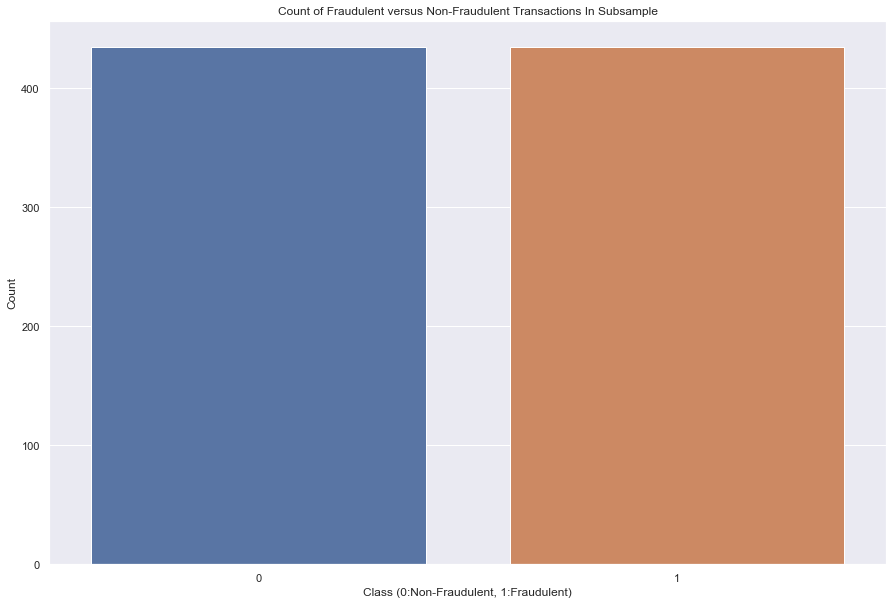

In [28]:
# Code. Replace 'missing':

new_counts = subsample.Class.value_counts()

# Create a 'Figure' object and a single 'axes.Axes' object:

fig, ax = plt.subplots(figsize=(15,10))

# Create a bar plot using seaborn:

ax = sns.barplot(x=new_counts.index, y=new_counts)

# Plot title:

ax.set_title('Count of Fraudulent versus Non-Fraudulent Transactions In Subsample');

# Set the y-axis title:
ax.set_ylabel('Count');

# Set the x-axis title:
ax.set_xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)');

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Correlations between Class and the anonymised variables}}$</h1>

### <p align="justify" style="line-height:25px">1. Take a look at [correlations once more](#corr), but now in the $\color{blue}{\texttt{subsample}}$ dataset. After that, extract the column $\color{blue}{\texttt{Class}}$ in a DataFrame named $\color{blue}{\texttt{corr}}$ in order to focus only on the correlations between the $\color{blue}{\texttt{Class}}$ and the variables V1, V2, $\dots$<br><br>2. From this DataFrame, extract all variables Vi with negative correlations smaller than $-0.5$.<br><br>3. Now extract all variables Vi with positive correlations greater than $0.5$. 

In [29]:
# Code for 1. Replace 'missing':

corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.448423
V2,0.495794
V3,-0.562930
V4,0.714461
V5,-0.379790
V6,-0.392086
V7,-0.475942
V8,0.070120
V9,-0.557583
V10,-0.626839


In [30]:
# Code for 2. Replace 'missing':

high_neg_corr = corr[corr.Class < -0.5]
high_neg_corr

,Class
V3,-0.562930
V9,-0.557583
V10,-0.626839
V12,-0.679176
V14,-0.748581
V16,-0.590103
V17,-0.552164


In [31]:
# Code for 3. Replace 'missing':

high_pos_corr = corr[corr.Class > 0.5]
high_pos_corr

,Class
V4,0.714461
V11,0.682014
Class,1.000000


<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Visualizing features with high negative correlation}}$</h1>

### <p align="justify" style="line-height:25px"> Produce a $m\times n$ grid of boxplots for the variables with high negative correlation, spliting the $x-$axis into fraudulent and non-fraudulent transactions. Do the same for the variables with high positive correlation.

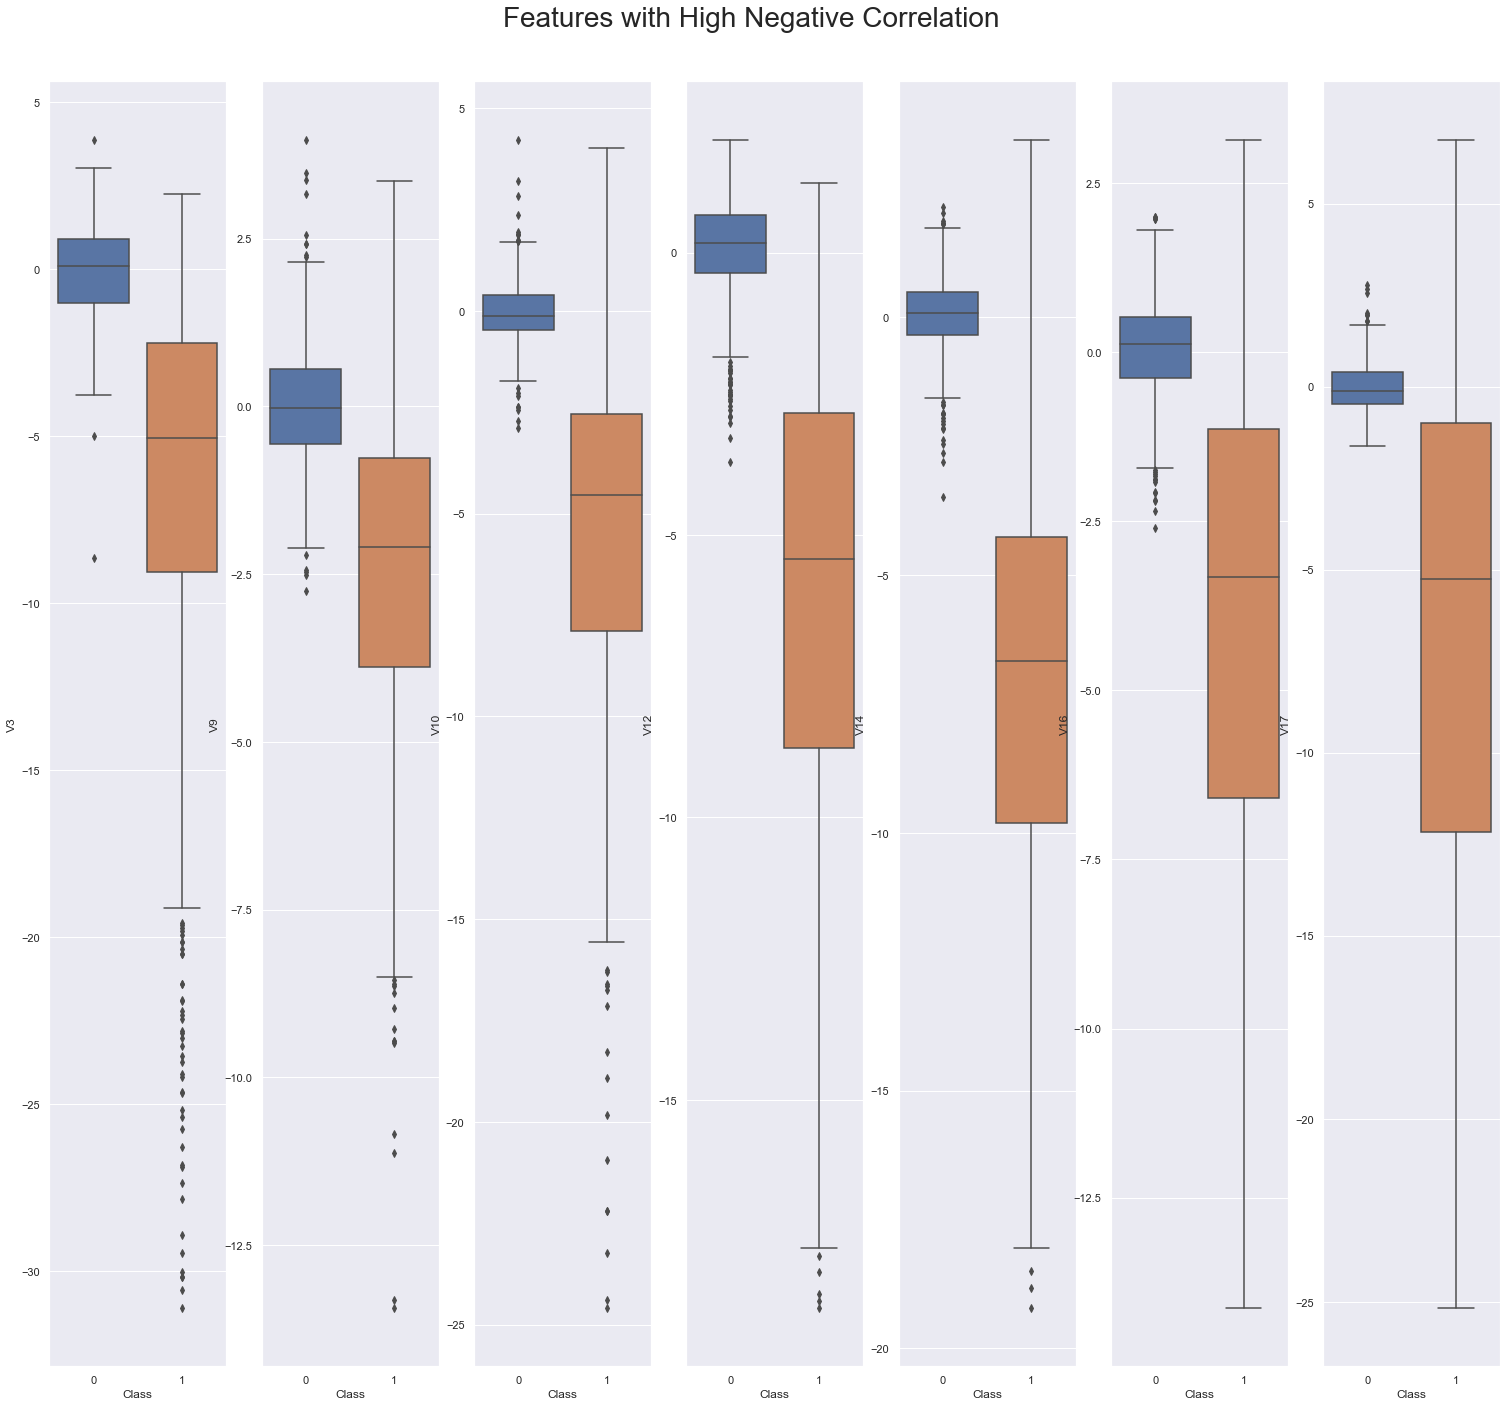

In [32]:
# Code for high negative correlation boxplots. Replace 'missing':

# Create a 'Figure' object and a single 'axes.Axes' object specifying the shape of the grid:

f, axes = plt.subplots(nrows=2, ncols=len(high_neg_corr), figsize=(26,52));

f.suptitle('Features with High Negative Correlation', y=0.9, fontsize=28);

# The following lines should display a boxplot each, type as many such lines as needed and distribute them equally in the
# grid using ax=axes[a,b]. The last line deletes the [a,b] entrance of the grid, use it if you need it.

neg_index = [index for index in high_neg_corr.index]

for i in range (len(neg_index)):
    sns.boxplot(x="Class", y=neg_index[i], data=subsample, ax=axes[0,i]);
    f.delaxes(axes[1,i]);

IndexError: index 2 is out of bounds for axis 1 with size 2

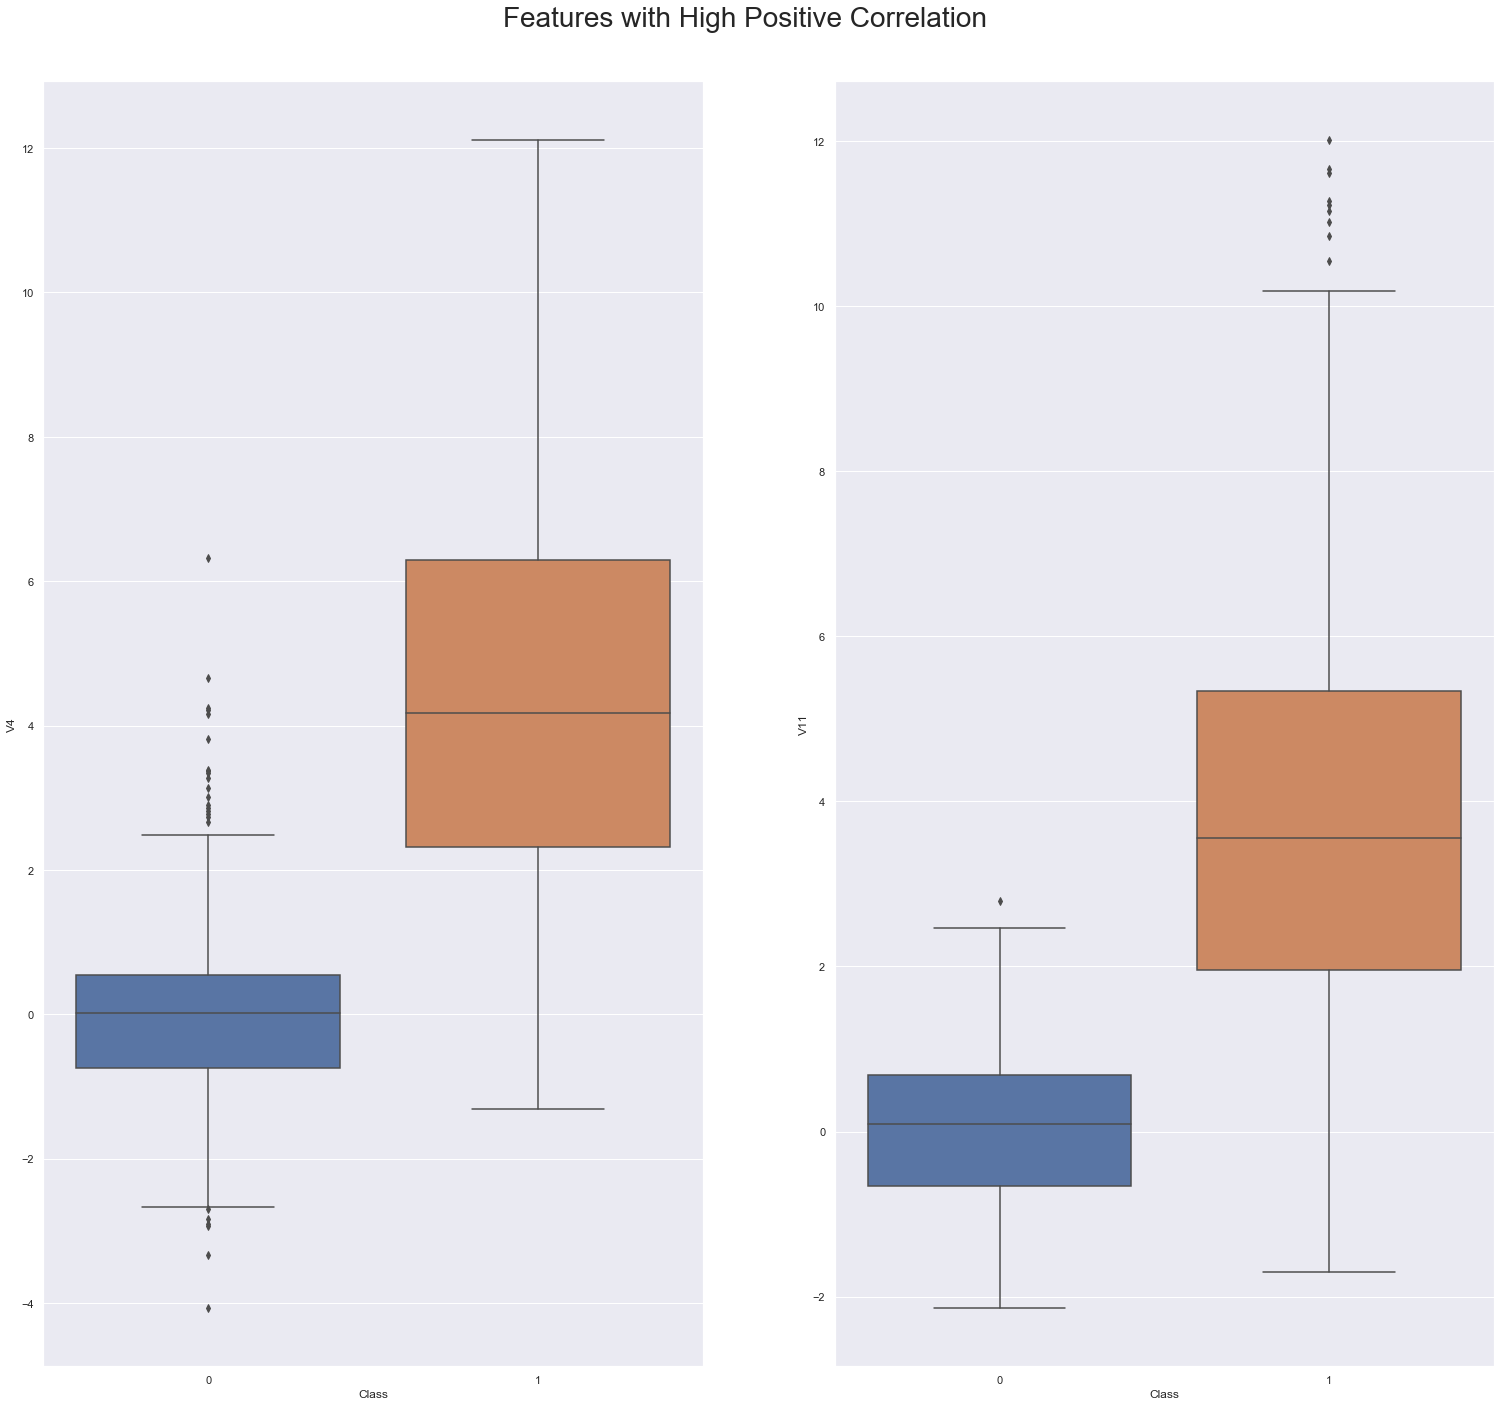

In [41]:
# Code for high negative correlation boxplots. Replace 'missing':

# Create a 'Figure' object and a single 'axes.Axes' object specifying the shape of the grid:

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(26,52));

f.suptitle('Features with High Positive Correlation', y=0.9, fontsize=28);

# The following lines should display a boxplot each, type as many such lines as needed and distribute them equally in the
# grid using ax=axes[a,b]. The last line deletes the [a,b] entrance of the grid, use it if you need it.

pos_index = [index for index in high_pos_corr.index]

for i in range (len(pos_index)):
    sns.boxplot(x="Class", y=pos_index[i], data=subsample, ax=axes[0,i]);
    f.delaxes(axes[1,i]);

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Reading the boxplots}}$</h1>

### <p align="justify" style="line-height:25px">Compare the medians of fraudulent and non-fraudulent transactions from the above boxplots. What can you observe? Does this show that fraudulent transactions contribute more to the negative/positive correlation?<br><br>$\color{red}{\textbf{Non-Fraudulent transactions have zero mean, while Fraudulent transactions have a mean far from zero in all cases.}}$<br>$\color{red}{\textbf{For negative correlation boxplot, it can be seen that there is a lot of dispersion in the Fraudulent variable as well as many atypical observations.}}$<br>$\color{red}{\textbf{Fraudulent transactions contribute more to the negative correlation since there are more variables with negative correlation.}}$

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Remove extreme outliers}}$</h1>

### <p align="justify" style="line-height:25px">Sure enough we can see several anomalies (outliers) from the boxplots above. Remove the [extreme outliers](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm) from the $\color{blue}{\texttt{subsample}}$ dataset.<br><br>1. Define the first and third quartile as $\color{blue}{\texttt{Q1}}$ and $\color{blue}{\texttt{Q3}}$, respectively, using the [pandas function quantile](https://www.geeksforgeeks.org/python-pandas-dataframe-quantile/).<br><br>2. Define the interquartile range as $\color{blue}{\texttt{IQR}}$.<br><br>3. Remove extreme outliers ($x<(Q1-3 IQR)$ or $x<(Q1-3 IQR)$) from the $\color{blue}{\texttt{subsample}}$ dataset using the [numpy function any](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.any.html) and save this new DataFrame under the name $\color{blue}{\texttt{df}\_{\texttt{out}}}$.

In [34]:
# Code for 1 and 2. Replace 'missing':

Q1 = subsample.quantile(.25)
Q3 = subsample.quantile(.75)
IQR = Q3 - Q1

# Code for 3. Replace 'missing':

df_out = subsample[~((subsample < (Q1 - 3 * IQR)) | (subsample > (Q3 + 3 * IQR))).any(axis=1)]

# Code for showing the reduction of the dataset (nothing to replace here):

len_after = len(df_out)
len_before = len(subsample)
len_difference = len(subsample) - len(df_out)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 870 transactions by 215 transactions to 655 transactions.


<h1>$\color{blue}{\textbf{t-Distributed Stochastic Neighbor Embedding}}$</h1>

<h2>$\color{blue}{\textbf{Overview}}$</h2>

### <p align="justify" style="line-height:25px">[t-Distributed Stochastic Neighbor Embedding (t-SNE)](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) is a technique for dimensionality reduction that is well suited for the visualization of high-dimensional datasets. The aim of dimensionality reduction is to preserve as much of the significant structure of the high-dimensional data as possible in the low-dimensional map.
    
<img src="Images/tsne.png" alt="tsne" style="display: auto;margin-left:auto;margin-right: auto;width:30%;"/>
    
### <p align="justify" style="line-height:25px">t-SNE is capable of capturing much of the local structure of the high-dimensional data very well, while also revealing global structure such as the presence of clusters at several scales. It uses a Student-t distribution to compute the similarity between two points in the high-dimensional space and in the low-dimensional space. It then tries to optimize these two similarity measures using a cost function.<br><br> You can find many interesting [examples of the use of t-SNE here](https://lvdmaaten.github.io/tsne/).



<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Applying t-SNE}}$</h1>

### <p align="justify" style="line-height:25px">Let us apply t-SNE to visualise the high-dimensional dataset $\color{blue}{\texttt{df}\_{\texttt{out}}}$.<br><br>1. Import the [TSNE](https://scikit-learn.org/stable/modules/manifold.html#t-sne) object from scikit-learn's [manifold](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) module and split the $\color{blue}{\texttt{df}\_{\texttt{out}}}$ DataFrame in two:<br><br>$\quad$a) Save the $\color{blue}{\texttt{Class}}$ column in a pandas Series named $\color{blue}{\texttt{y}}$, the dependent variable (now we use single brackets,<br>$\quad\,\,\,\,$ [not double like before](#doublebrackets), we are going to use this in the next code cell).<br>$\quad$b) Save the rest of the variables in a DataFrame named $\color{blue}{\texttt{X}}$, the independent variables (just [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) the $\color{blue}{\texttt{Class}}$<br>$\quad\,\,\,\,$ column).<br><br>2. Run [TSNE](https://scikit-learn.org/stable/modules/manifold.html#t-sne) with two components and setting a [random_state](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) of $42$.<a id="randstate"></a> In machine learning, we want to replicate our steps exactly same as performed before, to analyse the results. Hence $\color{blue}{\texttt{random}\_{\texttt{state}}}$ is fixed to some integer. Then "chain" the [sklearn fit_transform method](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE.fit_transform) to fit the [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html) of $\color{blue}{\texttt{X}}$ into a two-dimensional space and return that transformed output. Save it in a variable named $\color{blue}{\texttt{X}\_{\texttt{reduced}}\_{\texttt{tsne}}}$.

In [35]:
# Code for 1. Replace 'missing':

from sklearn.manifold import TSNE

X = df_out.drop('Class', axis=1)
y = df_out['Class']

# Code for 2. Replace 'missing':

import time
time_start = time.time()

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 4.873788833618164 seconds


<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{t-SNE Scatter Plot}}$</h1>

### <p align="justify" style="line-height:25px">Create the two-dimensional t-SNE scatter plot and color each transaction by its respective $\color{blue}{\texttt{Class}}$ label. We expect fraudulent and non-fraudulent transactions to be very clearly clustered in their own sub groups.<br><br>1. First we will create some color patches, so import patches from matplotlib as mpatches and Create a 'Figure' object and a single 'axes.Axes' object.<br><br>2. Create a blue patch for non-fraudulent transactions and a red patch for the fraudulent transactions using the [Patch method](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch). Save the variables as $\color{blue}{\texttt{blue}\_{\texttt{patch}}}$ and $\color{blue}{\texttt{red}\_{\texttt{patch}}}$, respectively.<br><br>3. Create a [scatter plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html) of the two components of $\color{blue}{\texttt{X}\_{\texttt{reduced}}\_{\texttt{tsne}}}$ and color them using the pandas Series $\color{blue}{\texttt{y}}$ that you defined in the cell above.

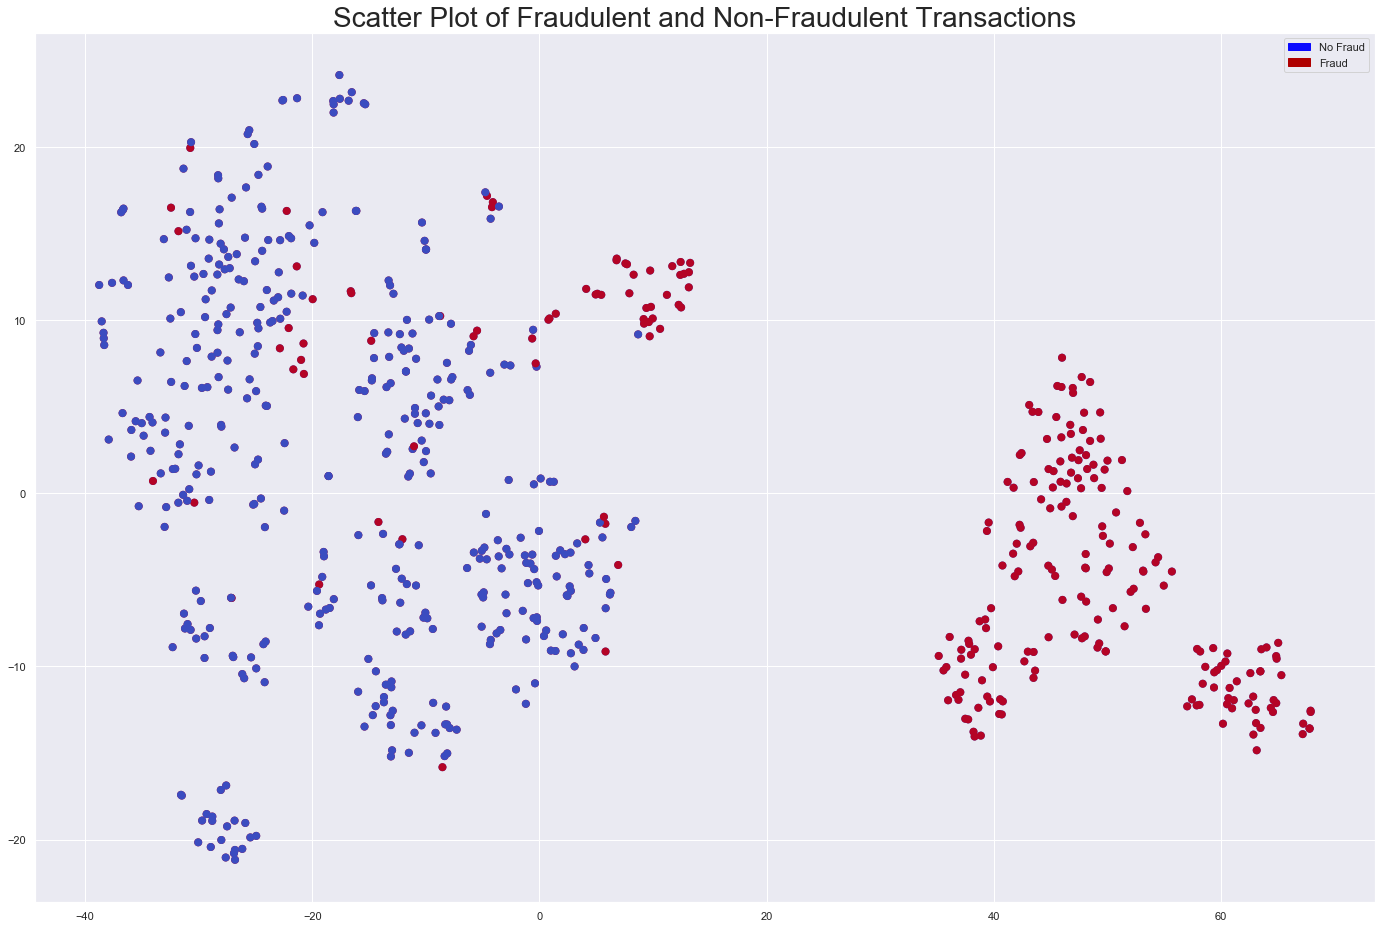

In [36]:
# Code for 1. Replace 'mising':

import matplotlib.patches as mpatches

# Create a 'Figure' object and a single 'axes.Axes' object. Replace 'missing':

f, ax = plt.subplots(figsize=(24,16))

# Code for 2. Replace 'missing':

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# Code for 3. Replace 'missing':

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2);
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2);
ax.set_title('Scatter Plot of Fraudulent and Non-Fraudulent Transactions', fontsize=28);

ax.grid(True);

ax.legend(handles=[blue_patch, red_patch]);

<h1>$\color{blue}{\textbf{Comparison of various Classification Algorithms}}$</h1>

<h2>$\color{blue}{\textbf{Overview}}$</h2>

### <p align="justify" style="line-height:25px">A classification task is the problem of defining the association between a categorical variable and independent variables that can take either continuous or discrete values. The categorical variable take values among a set of possible classes. In this project we deal with a binary classification problem; there are only two classes: Fradulent and non-fraudulent.<br><br>In a classification problem an algorithm is assessed on its overall accuracy to predict the correct classes of new unseen observations. Furthermore, in an unbalanced classification problem, the [Receiver Operating Characteristics-Area Under the Curve or ROC-AUC](https://www.sciencedirect.com/science/article/abs/pii/S016786550500303X) performance measure is used to evaluate the performance of a classifier. Essentially, the ROC-AUC <a id="rocauc"></a> measure is a value between zero and one, whereby one is a perfect score and zero the worst. An ROC-AUC score of above 0.5 means a higher performance than just random guessing.
    
<img src="Images/ROC.png" alt="ROC" style="display: auto;margin-left:auto;margin-right: auto;width:30%;"/>

### <p align="justify" style="line-height:25px"> In the graph above, TPR and FPR stand for True Positive Rate and False Positive Rate, which are defined as:
    
### $$\textbf{TPR}=\frac{TP}{TP+FN}\qquad\textbf{FPR}=\frac{FP}{FP+TN}$$

### <p align="justify" style="line-height:25px">where $TP, FN, FP$ and $TN$ are the numbers of True Positives, False Negatives, False Positives and True Negatives, respectively, given in the confusion matrix:

<img src="Images/ConfM.png" alt="Confusion Matrix" style="display: auto;margin-left:auto;margin-right: auto;width:20%;"/>

### <p align="justify" style="line-height:25px">In our case, $Y_1$ is the set of fraudulent transactions, $Y_0$ the set of non-fraudulent transactions, $\hat{Y}_1$ the set of transactions predicted as fraudulent and $\hat{Y}_0$ the set of transactions predicted as non-fraudulent.

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Spliting into training and test sets}}$</h1>

### <p align="justify" style="line-height:25px">When performing a (supervised) machine learning experiment, we want to hold out part of the available data as a test set $\color{blue}{\texttt{X}\_{\texttt{test}}}$, $\color{blue}{\texttt{y}\_{\texttt{test}}}$ and the other part as a training set $\color{blue}{\texttt{X}\_{\texttt{train}}}$, $\color{blue}{\texttt{y}\_{\texttt{train}}}$. A random split into training and test sets can be computed with the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from scikit-learn and we can hold out the desired percentage of the data for testing (evaluating) our classifier with $\color{blue}{\texttt{Test}\_{\texttt{size}}}$.<br><br>1. Import [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from the scikit-learn module [model selection](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and use it to define the test and training sets<a id="trainingset"></a> $\color{blue}{\texttt{X}\_{\texttt{test}}}$, $\color{blue}{\texttt{y}\_{\texttt{test}}}$, $\color{blue}{\texttt{X}\_{\texttt{train}}}$ and $\color{blue}{\texttt{y}\_{\texttt{train}}}$.  Hold out $20\%$ of the data for testing the classifier and a $\color{blue}{\texttt{random}\_{\texttt{state}}}$ of $42$ as [before](#randstate).<br><br>2. Save the $\color{blue}{\texttt{X}\_{\texttt{test}}}$ values and the $\color{blue}{\texttt{y}\_{\texttt{test}}}$ [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html) in variables named $\color{blue}{\texttt{X}\_{\texttt{validation}}}$ and $\color{blue}{\texttt{X}\_{\texttt{validation}}}$, respectively and print the $\color{blue}{\texttt{X}}$ and $\color{blue}{\texttt{y}}$ shapes.

In [37]:
# Code for 1. Replace 'missing':

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Code for 2. Replace 'missing'

X_validation = X_test.values
y_validation = y_test.values

print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('y_shapes:\n', 'y_train:', 'y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (524, 30) (131, 30) 

y_shapes:
 y_train: y_validation:
 (524,) (131,)


<h1>$\color{blue}{\textbf{Classification Algorithms}}$</h1>

<h2>$\color{blue}{\textbf{Overview}}$</h2>

### <p align="justify" style="line-height:25px">The goal of classification is to be able to place a given object into the appropriate category based on data associated with this object. In the present case, the object is the credit card transaction and there are two assigned categories, fraudulent and non-fraudulent.<br><br>Here you can read about the following [classification algorithms in Machine Learning](https://medium.com/@Mandysidana/machine-learning-types-of-classification-9497bd4f2e14): Logistic Regression, Naive Bayes Classifier, Nearest Neighbor, Support Vector Machines, Decision Trees, Boosted Trees, Random Forest and Neural Networks.
    
<img src="Images/Classify.png" alt="Classify" style="display: auto;margin-left:auto;margin-right: auto;width:40%;"/>


### <p align="justify" style="line-height:25px">There are a lot of classification algorithms available and it is hard, or even impossible, to conclude which one is superior to other. It depends on the application and nature of available data set.<br><br>Now let us compare some classifiers!

<h1>$\color{blue}{\textbf{Importing Classification Algorithms and metrics}}$</h1>

### <p align="justify" style="line-height:25px">Run the following cell to import all the models and metrics you need to complete the case study into the Jupyter Notebook. All these imports are from the [scikit-learn library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

try:
    from xgboost import XGBClassifier
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install xgboost
except:
    raise Exception("SOME OTHER ERROR WITH LOADING XGBOOST")

<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Comparing machine learning algorithms}}$</h1>

### <p align="justify" style="line-height:25px"> It is crucial to compare the performance of different machine learning algorithms consistently. Therefore, in the following cell, you will create a test harness to compare multiple different machine learning algorithms in Python with scikit-learn. Summarize the results both numerically and using boxplots<br><br>1. Create a list for appending the models, name it $\color{blue}{\texttt{models}}$.<br><br>2. Create, configure and append the models: [Append](https://docs.python.org/3/tutorial/datastructures.html) the following algorithms to the $\color{blue}{\texttt{models}}$' list: $\color{blue}{\texttt{LogisticRegression}}$, $\color{blue}{\texttt{LinearDiscriminantAnalysis}}$, $\color{blue}{\texttt{KNeighborsClassifier}}$, $\color{blue}{\texttt{DecisionTreeClassifier}}$, $\color{blue}{\texttt{SVC}}$, $\color{blue}{\texttt{XGBClassifier}}$ and $\color{blue}{\texttt{RandomForestClassifier}}$.<br><br>3. Test the models.<br><br>$\quad$a) Create two lists named $\color{blue}{\texttt{results}}$ and $\color{blue}{\texttt{names}}$.<br><br>$\quad$b) Then, for $\color{blue}{\texttt{name}}$, $\color{blue}{\texttt{model}}$ in $\color{blue}{\texttt{models}}$, use a [K-Folds cross-validator](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) with $10$ folds to evaluate each algorithm,<br>$\quad\,\,\,\,\,$name it $\color{blue}{\texttt{kfold}}$. Configure it with the same [random state as before](#randstate) to ensure that the same splits to the<br>$\quad\,\,\,\,$ training data are performed and that each algorithm is evaluated in precisely the same way.<br><br>$\quad$c) Use the [cross_val_score from](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function from $\color{blue}{\texttt{sklearn.model}\_{\texttt{selection}}}$ to evaluate a score (by cross<br>$\quad\,\,\,\,\,$validation) of each $\color{blue}{\texttt{model}}$ in the [training set](#trainingset) $\color{blue}{\texttt{X}\_{\texttt{train}}}$, $\color{blue}{\texttt{y}\_{\texttt{train}}}$. Use $\color{blue}{\texttt{cv}}$ as the $\color{blue}{\texttt{kfold}}$ defined above and the <br>$\quad\,\,\,\,\,\color{blue}{\texttt{roc}\_{\texttt{auc}}}$ measure ([ROC-AUC](#rocauc)) for $\color{blue}{\texttt{scoring}}$. Save this part in a variable named $\color{blue}{\texttt{cv}\_{\texttt{results}}}$ and [append](https://docs.python.org/3/tutorial/datastructures.html) it to<br>$\quad\,\,\,\,\,$the $\color{blue}{\texttt{results}}$' list (to be used in the next cell). [Append](https://docs.python.org/3/tutorial/datastructures.html) each name in the $\color{blue}{\texttt{names}}$' list as well. Finally, print the<br>$\quad\,\,\,\,\,$numerical summary of the results: (name, mean accuracy, standard deviation accuracy).

In [39]:
# Code for 1. Replace 'missing':

models = []

# Code for 2. Replace 'missing':

# Note 1. Dealing with FutureWarning for LogisticRegression: From version 0.22 the default solver used for finding coefficients 
# will change from 'liblinear' (which it is now) to 'lbfgs'.

models.append(('LR', LogisticRegression(solver='lbfgs')))

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('CART', DecisionTreeClassifier()))

# Note 2. Dealing with FutureWarning for SVM: From version 0.22 the default value of gamma will change from 'auto' (which it 
# is now) to 'scale'. Set 'gamma' here explicitly to 'auto' or 'scale' to avoid this warning. The gamma argument only impacts 
# SVM models that use the RBF, Polynomial, or Sigmoid kernel. The parameter controls the value of the 'gamma' coefficient used 
# in the algorithm and if you do not specify a value, a heuristic is used to specify the value.

models.append(('SVM', SVC(gamma='scale')))

models.append(('XGB', XGBClassifier()))

# Note 3. Dealing with FutureWarning for Decision Tree Ensemble Algorithms:# From version 0.22 the default value of 
# 'n_estimators' will change from 10 (which it is now) to 100. Set 'n_estimators' to 100 here explicitly to avoid this warning.
# The decision-tree based ensemble algorithms will change the number of sub-models or trees used in the ensemble controlled by 
# the 'n_estimators' argument. This affects models random forest and extra trees for classification and regression, 
# specifically the classes: 'RandomForestClassifier', 'RandomForestRegressor', 'ExtraTreesClassifier',
# 'ExtraTreesRegressor', and 'RandomTreesEmbedding'.

models.append(('RF', RandomForestClassifier(n_estimators=100)))

# Code for 3 a). Replace 'missing':

results = []
names = []

# Code for 3 b) and c). Replace 'missing':

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    summary = '%s:  Mean:  %f.  Std dev.:  %f.' % (name, cv_results.mean(), cv_results.std())
    print(summary)

LR:  Mean:  0.980820.  Std dev.:  0.011871.
LDA:  Mean:  0.976470.  Std dev.:  0.008604.
KNN:  Mean:  0.965608.  Std dev.:  0.022474.
CART:  Mean:  0.901026.  Std dev.:  0.022327.
SVM:  Mean:  0.983549.  Std dev.:  0.015921.
XGB:  Mean:  0.978432.  Std dev.:  0.010689.
RF:  Mean:  0.970964.  Std dev.:  0.019088.


<img src="Images/broke.jpg" width="100" align="Left"/> 
<h1>$\,\,\,\color{blue}{\textbf{Visual Comparison of th machine learning algorithms}}$</h1>

### <p align="justify" style="line-height:25px"> Produce boxplots showing the spread of the accuracy scores across each cross validation fold for each of the above algorithms.

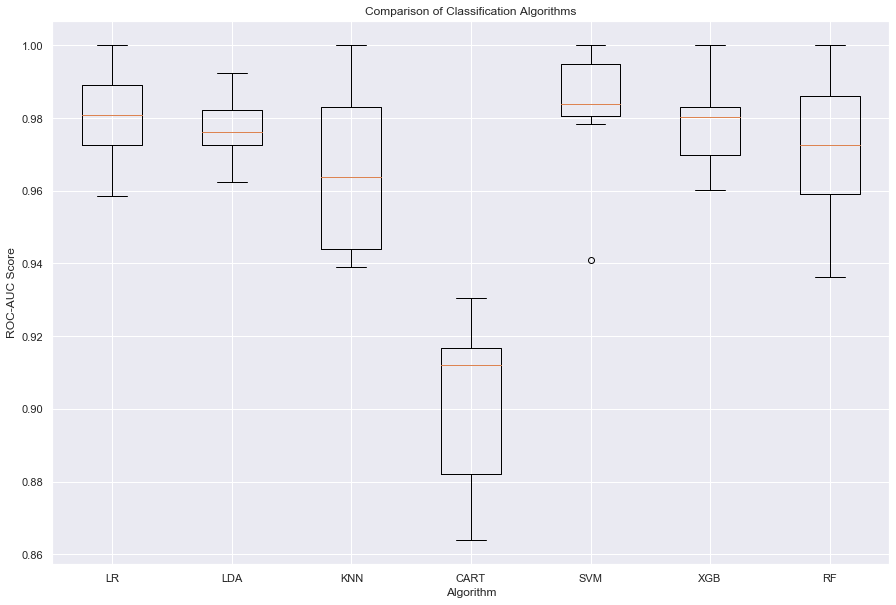

In [42]:
# Code. Replace 'missing':

# Create a 'Figure' object and a single 'axes.Axes' object:

fig, ax = plt.subplots(figsize=(15,10))

# Create a boxplot of the results (recall the cell above):

ax.boxplot(results)

# Ticklabels:

ax.set_xticklabels(names)

# Titles and axes' labels:

ax.set_title('Comparison of Classification Algorithms')
ax.set_xlabel('Algorithm')
ax.set_ylabel('ROC-AUC Score')

# Show the boxplots:

plt.show()

<h1>$\color{blue}{\textbf{Conclusion}}$</h1>

### <p align="justify" style="line-height:25px"> Among the algorithms that you tested, what is most efficient algorithm for fraud detection? Why? Use the numerical and graphical summaries to compare the algorithms.<br><br>$\color{red}{\textbf{Answer}}$

<h1>$\color{blue}{\textbf{Further tasks for home (not to hand in)}}$</h1>

### <p align="justify" style="line-height:25px"> We used the undersampling technique, but there are many other techniques such as oversampling, SMOTE, CNN, ENN, NCL, OSS and Tomek Link. The task for you now, is to assess the efficiency of the other techniques and perhaps, a mix of undersampling and oversampling techniques.<br><h2>Have fun!</h2>